In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Final Transactions.csv')

In [3]:
data

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1754150,1754150,1754150,2023-07-02 23:56:36,161,655,531.43,15810996,182,0,0
1754151,1754151,1754151,2023-07-02 23:57:38,4342,6181,10.40,15811058,182,0,0
1754152,1754152,1754152,2023-07-02 23:58:21,618,1502,26.62,15811101,182,0,0
1754153,1754153,1754153,2023-07-02 23:59:52,4056,3067,550.43,15811192,182,0,0


In [4]:
data.duplicated().sum()

0

In [5]:
data.isna().sum()

Unnamed: 0           0
TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64

In [6]:
data.drop(['Unnamed: 0','TRANSACTION_ID'],axis=1,inplace=True)

In [7]:
data

,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0
...,...,...,...,...,...,...,...,...
1754150,2023-07-02 23:56:36,161,655,531.43,15810996,182,0,0
1754151,2023-07-02 23:57:38,4342,6181,10.40,15811058,182,0,0
1754152,2023-07-02 23:58:21,618,1502,26.62,15811101,182,0,0
1754153,2023-07-02 23:59:52,4056,3067,550.43,15811192,182,0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TX_DATETIME        object 
 1   CUSTOMER_ID        int64  
 2   TERMINAL_ID        int64  
 3   TX_AMOUNT          float64
 4   TX_TIME_SECONDS    int64  
 5   TX_TIME_DAYS       int64  
 6   TX_FRAUD           int64  
 7   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 107.1+ MB


In [9]:
data['TX_FRAUD_SCENARIO'].value_counts()

0    1518186
1     222261
2       9077
3       4631
Name: TX_FRAUD_SCENARIO, dtype: int64

In [10]:
data['TX_FRAUD'].value_counts()

0    1518186
1     235969
Name: TX_FRAUD, dtype: int64

In [11]:
data.drop(['TX_FRAUD_SCENARIO'],axis=1,inplace=True)
data.drop(['TX_DATETIME'],axis=1,inplace=True)

<AxesSubplot:>

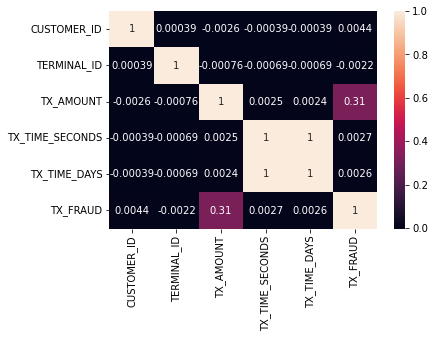

In [12]:
sns.heatmap(data.corr(),annot=True)

## Decision Tree

In [25]:
x=data.drop('TX_FRAUD',axis=1)
y=data['TX_FRAUD']
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.1)
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(train_x,train_y)
y_pred=model.predict(test_x)

In [26]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("acc:",accuracy_score(y_pred,test_y))
print("precision:",precision_score(y_pred,test_y))
print("recall:",recall_score(y_pred,test_y))
print("f1_score:",f1_score(y_pred,test_y))

acc: 0.9988997582888676
precision: 0.9958856555093644
recall: 0.9958429759149738
f1_score: 0.9958643152548909


In [27]:
y_pred=model.predict(train_x)
print("acc:",accuracy_score(y_pred,train_y))
print("precision:",precision_score(y_pred,train_y))
print("recall:",recall_score(y_pred,train_y))
print("f1_score:",f1_score(y_pred,train_y))

acc: 1.0
precision: 1.0
recall: 1.0
f1_score: 1.0


## AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))
model.fit(train_x,train_y)
y_pred=model.predict(test_x)

In [23]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("acc:",accuracy_score(y_pred,test_y))
print("precision:",precision_score(y_pred,test_y))
print("recall:",recall_score(y_pred,test_y))
print("f1_score:",f1_score(y_pred,test_y))

acc: 0.995485018470379
precision: 0.9663107745969629
recall: 1.0
f1_score: 0.9828667849262319


In [24]:
y_pred=model.predict(train_x)
print("acc:",accuracy_score(y_pred,train_y))
print("precision:",precision_score(y_pred,train_y))
print("recall:",recall_score(y_pred,train_y))
print("f1_score:",f1_score(y_pred,train_y))

acc: 0.995301313263307
precision: 0.9650851925068248
recall: 1.0
f1_score: 0.9822324204434948
